In [35]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
print('all libraries imported')

all libraries imported


In [36]:
st = time.time()
#reading the dataset into dataframe
df_advert = pd.read_csv('advertising.csv')
df_advert.head(25)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [37]:
df_advert.shape

(200, 4)

In [38]:
df_advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [39]:
df_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [40]:
#to check if there is any null value in the dataset
df_advert.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Distribution of TV')

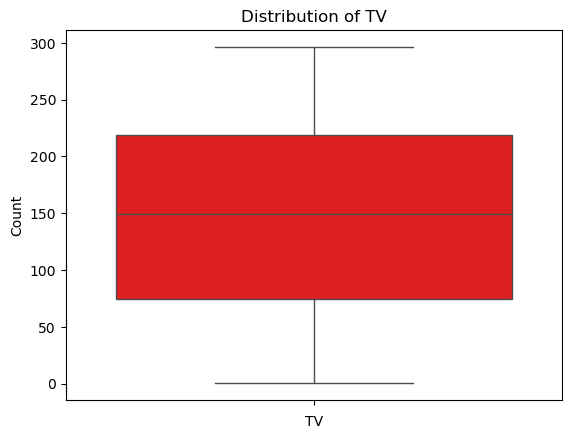

In [41]:
#since there is no null values and the data are in the correct datatypes, we would go ahead and do exploratory analysis
#checking for outliers in TV column
sns.boxplot(data=df_advert['TV'], color='red')
plt.xlabel('TV')
plt.ylabel('Count')
plt.title('Distribution of TV')

Text(0.5, 1.0, 'Distribution of Radio')

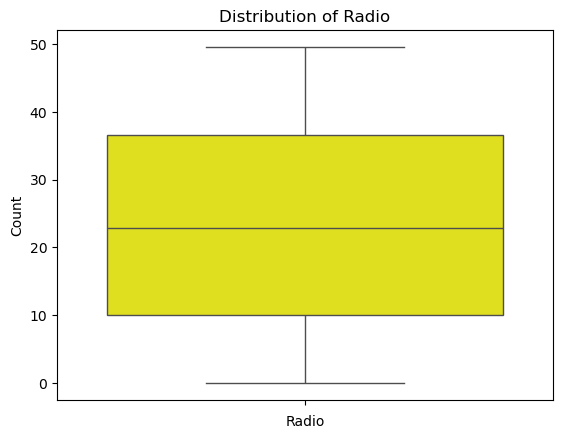

In [42]:
#checking for outliers in Radio column
sns.boxplot(data=df_advert['Radio'], color='yellow')
plt.xlabel('Radio')
plt.ylabel('Count')
plt.title('Distribution of Radio')

Text(0.5, 1.0, 'Distribution of Newspaper')

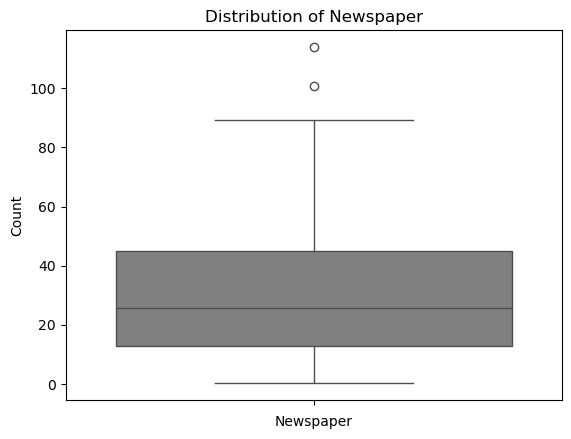

In [43]:
#checking the distribution of newspaper
sns.boxplot(data=df_advert['Newspaper'], color='gray')
plt.xlabel('Newspaper')
plt.ylabel('Count')
plt.title('Distribution of Newspaper')

In [44]:
#we can see that only the newspaper has outlier, lets describe that column
df_advert.Newspaper.describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

Text(0.5, 1.0, 'Correleration Matrix')

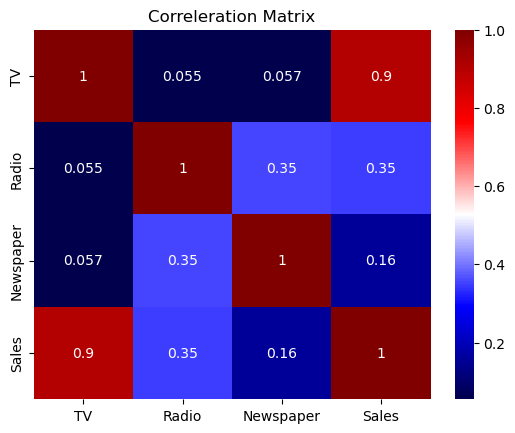

In [51]:
#to check for correleration between columns
corr_matrix = df_advert.corr()
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title('Correleration Matrix')


From the visualization above, TV has the highest correlation with Sales

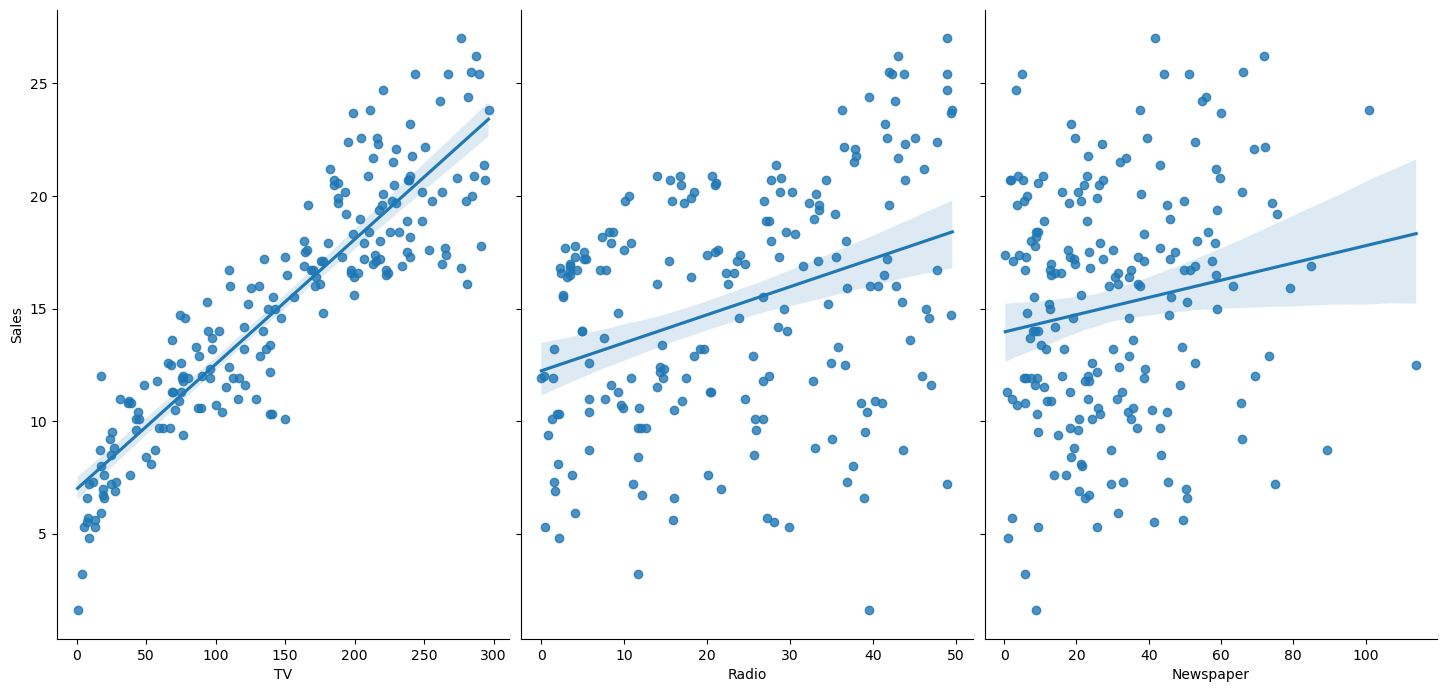

In [52]:
#plotting a pairplot
sns.pairplot(df_advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

The plot shows that more sales are made when TV is more advertised.

In [53]:
#from the results above, we can see that there is no much to de done as regards data processing
#splitting data into target and features
x = df_advert.drop('Sales', axis=1)
y = df_advert['Sales']

In [55]:
#importing our model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Splitting the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Square is ', round(MAE, 2))
MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared error is ', round(MSE, 2))
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred) )
print('Root Mean Squared Error is ', round(RMSE, 2))
r2_sco = metrics.r2_score(y_test, y_pred)
print('r2 score is ', round(r2_sco, 2))

Mean Absolute Square is  1.42
Mean Squared error is  4.52
Root Mean Squared Error is  2.13
r2 score is  0.86


In [57]:
#getting the coefficient of each of the features and putting it in a dataframe
df_coefficient = pd.DataFrame({'Feature': x.columns, 'coefficient': regr.coef_})
df_coefficient

,Feature,coefficient
0,TV,0.053680
1,Radio,0.111526
2,Newspaper,-0.003512


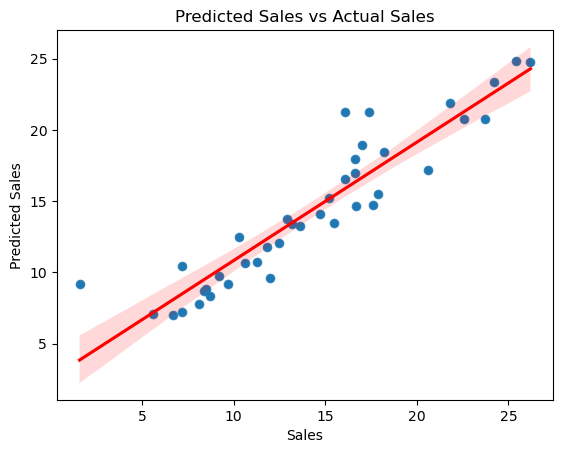

In [64]:
#making a scatter plot of predicted sales vs actual sales and drawing line of best fit
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales vs Actual Sales')
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'red'})
plt.show()

In [83]:
#to make a predictive test of our trained model
input_data = [34.6, 56.23, 43.7]
input_data_array = np.asarray(input_data)
input_data_reshape = input_data_array.reshape(1, -1)
prediction = float(regr.predict(input_data_reshape))
print(round(prediction, 2))

12.75


c:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\MY PC\AppData\Local\Temp\ipykernel_13340\2340884146.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = float(regr.predict(input_data_reshape))
